In [1]:
import greedy_algorithm
import celf
import celfpp
import simulated_annealing
import genetic_algorithm
import artificial_bee_colony_optimization

In [2]:
import random
import math
import time
import numpy as np
import matplotlib.pyplot as plt
from igraph import Graph  
from tqdm import tqdm
from itertools import product
import itertools 
import pandas as pd
import heapq
import copy

In [3]:
df = pd.read_csv('dataset/com-amazon.ungraph.txt.gz', compression='gzip', names=["source", "target"], sep='\t', quotechar='"', error_bad_lines=False)
print(df.head(10))

                                              source    target
0  # Undirected graph: ../../data/output/amazon.u...       NaN
1                                           # Amazon       NaN
2                      # Nodes: 334863 Edges: 925872       NaN
3                                       # FromNodeId  ToNodeId
4                                                  1     88160
5                                                  1    118052
6                                                  1    161555
7                                                  1    244916
8                                                  1    346495
9                                                  1    444232


/DATA/amit_1911cs01/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df=df.drop([0, 1,2,3])

In [5]:
df

,source,target
4,1,88160
5,1,118052
6,1,161555
7,1,244916
8,1,346495
...,...,...
925871,548343,548378
925872,548354,548356
925873,548368,548454
925874,548391,548411


In [6]:
df['source'] = df['source'].astype(int)
df['target'] = df['target'].astype(int)

In [7]:
df=df-[1,1]

In [8]:
df.min()

source      0
target    365
dtype: int64

In [9]:
df.max()

source    548410
target    548550
dtype: int64

In [10]:
com_amazon_network=Graph(directed=True)
com_amazon_network.add_vertices(548551)
com_amazon_network.add_edges(zip(df["source"], df["target"]))
print("Number of vertices in the graph:",com_amazon_network.vcount())
print("Number of edges in the graph",com_amazon_network.ecount())
print("Is the graph directed:", com_amazon_network.is_directed())
print("Maximum degree in the graph:", com_amazon_network.maxdegree())

Number of vertices in the graph: 548551
Number of edges in the graph 925872
Is the graph directed: True
Maximum degree in the graph: 549


In [11]:
com_amazon_network.summary()

'IGRAPH D--- 548551 925872 -- '

In [12]:
graph=com_amazon_network
# brute_force_spreads1=[] 
# brute_force_elapsed1=[] 
# greedy_spreads1=[] 
# greedy_elapsed1=[] 
# celf_spreads1=[] 
# celf_elapsed1=[] 
# celfpp_spreads1=[] 
# celfpp_elapsed1=[]
simulated_annealing_spreads1=[] 
simulated_annealing_elapsed1=[] 
genetic_algorithm_spreads1=[] 
genetic_algorithm_elapsed1=[]
artificial_bee_colony_optimization_spreads1=[]
artificial_bee_colony_optimization_elapsed1=[]
lower_seed_size,higher_seed_size=50,56
for i in tqdm(range(lower_seed_size,higher_seed_size,1)):
    k = i
    prob = 0.1
    n_iters =10
    #brute_force_solution,brute_force_spreads,brute_force_elapsed=brute_force(graph,k,prob,n_iters)
    #greedy_solution, greedy_spreads, greedy_elapsed = greedy_algorithm.algo(graph, k, prob, n_iters)
#     celf_solution, celf_spreads, celf_elapsed= celf.algo(graph, k, prob, n_iters)
#     celfpp_solution, celfpp_spreads, celfpp_elapsed = celfpp.algo(graph, k, prob, n_iters)
    simulated_annealing_solution,simulated_annealing_spreads,simulated_annealing_elapsed=simulated_annealing.algo(graph,k,prob,n_iters)
    generation_count=20
    population_size=100
    genetic_algorithm_solution,genetic_algorithm_spreads,genetic_algorithm_elapsed=genetic_algorithm.algo(graph,generation_count,population_size,k)
    
    artificial_bee_colony_optimization_solution,artificial_bee_colony_optimization_spreads,artificial_bee_colony_optimization_elapsed=artificial_bee_colony_optimization.algo(graph,k,prob,n_iters)



    #brute_force_spreads1.append(brute_force_spreads) 
    #brute_force_elapsed1.append(brute_force_elapsed) 
    
#     greedy_spreads1.append(greedy_spreads)
#     greedy_elapsed1.append(greedy_elapsed)
    
#     celf_spreads1.append(celf_spreads) 
#     celf_elapsed1.append(celf_elapsed)
    
#     celfpp_spreads1.append(celfpp_spreads) 
#     celfpp_elapsed1.append(celfpp_elapsed)
    
    simulated_annealing_spreads1.append(simulated_annealing_spreads) 
    simulated_annealing_elapsed1.append(simulated_annealing_elapsed)
    genetic_algorithm_spreads1.append(genetic_algorithm_spreads) 
    genetic_algorithm_elapsed1.append(genetic_algorithm_elapsed)
    artificial_bee_colony_optimization_spreads1.append(artificial_bee_colony_optimization_spreads) 
    artificial_bee_colony_optimization_elapsed1.append(artificial_bee_colony_optimization_elapsed)

100%|██████████| 6/6 [07:54<00:00, 79.08s/it]


In [13]:
x=list(range(lower_seed_size,higher_seed_size,1))

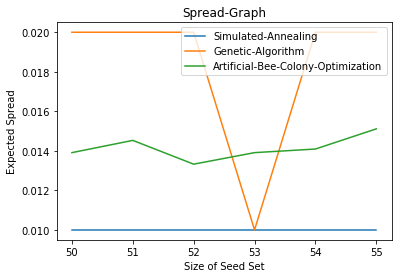

In [14]:
# plotting the points  
#plt.plot(x, y1,label="Brute-force") 

# plt.plot(x, greedy_spreads1,label="Greedy")

# plt.plot(x, celf_spreads1,label="CELF")

# plt.plot(x, celfpp_spreads1,label="CELF++")

plt.plot(x, simulated_annealing_spreads1,label="Simulated-Annealing")
plt.plot(x, genetic_algorithm_spreads1,label="Genetic-Algorithm")
plt.plot(x, artificial_bee_colony_optimization_spreads1,label="Artificial-Bee-Colony-Optimization")
# naming the x axis 
plt.xlabel('Size of Seed Set') 
# naming the y axis 
plt.ylabel('Expected Spread') 
  
# giving a title to my graph 
plt.title('Spread-Graph') 
plt.legend()
# function to show the plot 
plt.show() 

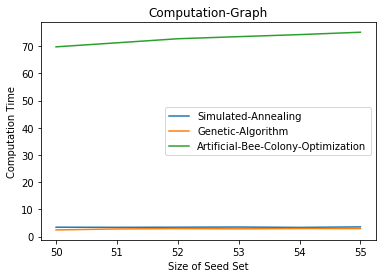

In [15]:
# plotting the points 
#plt.plot(x, brute_force_elapsed1,label="Brute-force") 

# plt.plot(x, greedy_elapsed1,label="Greedy")

# plt.plot(x, celf_elapsed1,label="CELF")

# plt.plot(x, celfpp_elapsed1,label="CELF++")

plt.plot(x, simulated_annealing_elapsed1,label="Simulated-Annealing")
plt.plot(x, genetic_algorithm_elapsed1,label="Genetic-Algorithm")
plt.plot(x, artificial_bee_colony_optimization_elapsed1,label="Artificial-Bee-Colony-Optimization")
# naming the x axis 
plt.xlabel('Size of Seed Set') 
# naming the y axis 
plt.ylabel('Computation Time') 
  
# giving a title to my graph 
plt.title('Computation-Graph') 
plt.legend()
# function to show the plot 
plt.show() 